## Predictive Modelling

# Data Preprocessing


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Load your data
data = pd.read_excel('Impute_FT_Data.xlsx')

# List of target columns to predict
# Excluded Rank columns:
# 'Rank', 'Careers service rank', 'International course experience rank',
# 'International work mobility rank', 'Career progress rank', 'Value for money rank'

target_columns = [
    'International board (%)',
    'Internships (%)',
    'Faculty with doctorates (%)',
    'Average course length (months)',
    'Women on board (%)',
    'Female students (%)',
    'Female faculty (%)',
    'Salary percentage increase',
    'Weighted salary (US$)',
    'Employed at three months (%)',
    'International faculty (%)',
    'International students (%)',
    'Aims achieved (%)'
]

# Predict data for the missing FT rows

train_data = data.iloc[:100]
prediction_data = data.iloc[100:201]

# Iterate over each target column and perform linear regression excluding Rank Columns
for column in target_columns:
    # Prepare training set for the target column
    train_set = train_data[['Rank', column]].dropna()


    # Check if there's enough data to train
    if len(train_set) > 1:
        # Training the model
        model = LinearRegression()
        model.fit(train_set[['Rank']], train_set[column])

        # Predicting for rows 101-201
        predictions = model.predict(prediction_data[['Rank']])

        # Taking absolute values and rounding up
        prediction_data[column] = np.ceil(np.abs(predictions))

# Update original data frame
data.iloc[100:201] = prediction_data


# Exclude non-numeric columns, for example "School Name"
numeric_data = data.select_dtypes(include=[np.number])

# Define the new target columns, containing Ranks
target_columns_rf = [
    "Careers service rank",
    "International course experience rank",
    "International work mobility rank",
    "Career progress rank",
    "Value for money rank"
]

# Predict data for the missing FT rows
training_set_new = data.iloc[:100].select_dtypes(include=[np.number])
prediction_set_new = data.iloc[100:201].select_dtypes(include=[np.number])

# Check for any missing values in the training set features and fill them with median values
for column in training_set_new.columns.drop(target_columns_rf):
    median_value = training_set_new[column].median()
    training_set_new[column].fillna(median_value, inplace=True)
    prediction_set_new[column].fillna(median_value, inplace=True)

# Define the Random Forest models and predict the missing values for the specified target columns
predicted_values_new = {}

for target_column in target_columns_rf:
    # Check if the target column already has values
    if pd.isnull(prediction_set_new[target_column]).all():

        # Prepare the training data
        X_train_new = training_set_new.drop(columns=target_columns_rf)
        y_train_new = training_set_new[target_column]

        # Initialize the Random Forest model and Train the model
        rf_model_new = RandomForestRegressor(random_state=0)
        rf_model_new.fit(X_train_new, y_train_new)

        # Predict Rank columns using the trained Random Forest model
        X_predict_new = prediction_set_new.drop(columns=target_columns_rf)
        predicted_values_new[target_column] = rf_model_new.predict(X_predict_new)

# Add the predicted values to the prediction set
for target_column, predictions in predicted_values_new.items():
    prediction_set_new[target_column] = predictions

# Combine the training set and the prediction set with the newly imputed values
combined_data =np.ceil(np.abs(pd.concat([training_set_new, prediction_set_new])))


combined_data.tail()

In [ ]:
# Creating the final data frame with imputed FT values
columns_to_extract = [
    'Rank','Careers service rank', 'International board (%)',
    'International course experience rank', 'Internships (%)',
    'Faculty with doctorates (%)', 'International work mobility rank',
    'Average course length (months)', 'Women on board (%)',
    'Female students (%)', 'Female faculty (%)', 'Career progress rank',
    'Salary percentage increase', 'Weighted salary (US$)',
    'Value for money rank', 'Employed at three months (%)',
    'International faculty (%)', 'International students (%)',
    'Aims achieved (%)'
]

data_to_update = combined_data.iloc[100:200][columns_to_extract]
data_to_update
merged_data = pd.read_excel('FT_THE_Merged_Original.xlsx')
merged_data.update(data_to_update)

#Save the updated DataFrame back to an Excel file. You can choose a new file name to not overwrite the original file.
#merged_data.to_excel('Merged.xlsx', index=False)

#print("Excel sheet has been updated.")

#final_data = pd.read_excel('Merged.xlsx')
final_data = merged_data

Below is the code for THE imputation

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Load the data
# Assuming 'final_data' is already defined and loaded
data = final_data

# Function to impute missing values using Random Forest
def impute_missing_values(data, target_column, feature_columns):
    X = data[feature_columns]  # Features
    y = data[target_column]    # Target column with missing values

    # Splitting the data into training and prediction sets
    X_train = X[y.notnull()]
    y_train = y[y.notnull()]
    X_pred = X[y.isnull()]

    # Training the Random Forest Model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Predicting the missing values
    predicted_values = rf_model.predict(X_pred)

    # Imputing the missing values in the dataset
    data.loc[y.isnull(), target_column] = predicted_values

# Columns and their respective features for imputation
imputation_info = imputation_info = {
    'Teaching score': ['International course experience rank', 'Rank', 'Careers service rank'],
    'Research Score': ['Rank', 'Faculty with doctorates (%)'],
    'Citation score': ['Rank', 'Careers service rank'],
    'Industry income score': ['Rank', 'Careers service rank'],
    'International Outlook': ['Rank', 'International board (%)'],
    'International students(%)': ['Rank', 'International board (%)'],
    'Number of students': ['Rank', 'International students(%)', 'International faculty (%)', 'Female faculty (%)', 'Female students (%)'],
    'Student staff ratio': ['Rank', 'International students(%)', 'International faculty (%)', 'Female faculty (%)', 'Female students (%)'],
    'Female male ratio': ['Rank', 'International students(%)', 'International faculty (%)', 'Female faculty (%)', 'Female students (%)']
}

# Performing the imputations
for column, features in imputation_info.items():
    impute_missing_values(data, column, features)

# The updated DataFrame 'data' now contains the imputed values.
print("Imputation completed.")

# If you need to use this updated DataFrame later in your code, it's stored in 'data'
# For example:
print(data.head())


In [ ]:
# Create a new column based on 'GMAT Requirement'
data['GMAT_Indicator'] = data['GMAT Requirement'].map({'Yes': 1, 'No': 0})
#Clean col
data['Continent'] = data['Continent'].str.strip()

# Perform one-hot encoding on the 'GMAT_Indicator' column
data_encoded = pd.get_dummies(data, columns=['GMAT_Indicator'], prefix='GMAT_Indicator')

In [ ]:
# List of updated locations for the primary campus
updated_primary_campus_locations = [
    'Australia', 'Austria', 'Belgium', 'Canada', 'China', 'Denmark', 'Finland', 'France', 'Germany',
    'Hungary', 'India', 'Ireland', 'Italy', 'Morocco', 'Netherlands', 'Norway', 'Pakistan', 'Palestine',
    'Poland', 'Portugal', 'Russia', 'Singapore', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Taiwan',
    'United Kingdom', 'Brazil', 'Turkey', 'United States', 'Colombia', 'Latvia', 'Czech', 'Hong Kong',
    'South Korea', 'Saudi Arabia', 'New Zealand', 'South Africa', 'Estonia', 'Israel', 'Malaysia',
    'Greece', 'Ethiopia', 'Egypt'
]

# Create a dictionary mapping updated locations to numeric codes
location_codes_updated = {location: code + 1 for code, location in enumerate(updated_primary_campus_locations)}

# Create a new column with numeric codes for the updated location of the primary campus
data['Primary_Campus_Location_Code_Updated'] = data['Location by primary campus'].map(location_codes_updated)

In [ ]:
# Specify the column you want to encode
categorical_column = 'Continent'

# Map each continent to a numerical value
continent_mapping = {
    'Africa': 1,
    'Asia': 2,
    'Europe': 3,
    'North America': 4,
    'Oceania': 5,
    'South America': 6,
    'Australia':5
}

# Create a new column with numerical encoding for continents
data['Continent_Encoding'] = data[categorical_column].map(continent_mapping)


In [ ]:
data = data.drop('Primary_Campus_Location_Code_Updated',axis=1)

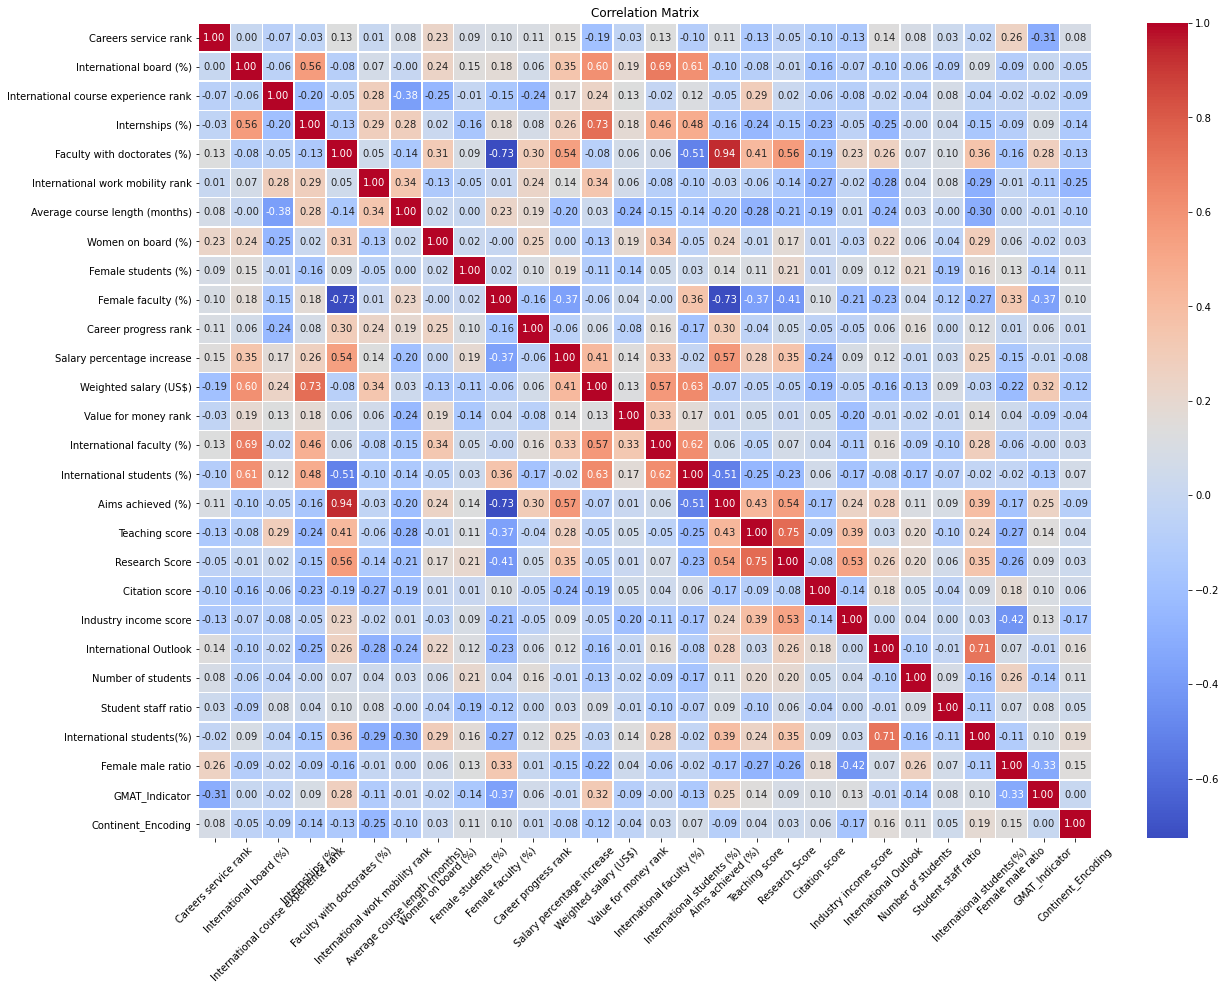

In [ ]:
#correlation matrix

import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap

plt.figure(figsize=(20, 15))  # Set the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Customize the plot (optional)
plt.title("Correlation Matrix")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Bucketing (Dividing recoreds in 10 classes)
new_class = []
for rank in data["Rank"]:
    if rank <= 20:
        new_class.append("A")
    elif rank <= 40:
         new_class.append("B")
    elif rank <= 60:
         new_class.append("C")
    elif rank <= 80:
         new_class.append("D")
    elif rank <= 100:
         new_class.append("E")
    elif rank <= 200:
         new_class.append("F")
    elif rank <= 300:
         new_class.append("G")
    elif rank <= 400:
         new_class.append("H")
    elif rank <= 500:
         new_class.append("I")
    elif rank <= 600:
         new_class.append("J")

data["new_class"] = new_class
data["new_class"].value_counts()

G    33
F    27
B    20
H    20
A    20
C    20
E    20
D    20
I    10
J    10
Name: new_class, dtype: int64

In [ ]:
#Oversampling

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# Assuming df is your DataFrame and 'new_class' is the column you want to balance
target_column = 'new_class'

# Count the occurrences of each class
class_counts = data[target_column].value_counts()

# Define the target count for balancing (use the maximum count)
target_count = class_counts.max()

# Define the sampling strategy for oversampling and undersampling
sampling_strategy_over = {cls: target_count for cls in class_counts.index}
sampling_strategy_under = {cls: target_count for cls in class_counts.index}

# Create instances of RandomOverSampler and RandomUnderSampler
ros = RandomOverSampler(sampling_strategy=sampling_strategy_over, random_state=42)
rus = RandomUnderSampler(sampling_strategy=sampling_strategy_under, random_state=42)

# Apply oversampling
df_oversampled, _ = ros.fit_resample(data, data[target_column])

# Apply undersampling
df_resampled, _ = rus.fit_resample(df_oversampled, df_oversampled[target_column])

# Display the resampled DataFrame and the counts of each value in the 'new_class' column after resampling
print("Resampled DataFrame:")
print(df_resampled[target_column].value_counts())

Resampled DataFrame:
F    33
B    33
H    33
A    33
C    33
G    33
E    33
I    33
J    33
D    33
Name: new_class, dtype: int64


In [ ]:
data = df_resampled

In [ ]:
columns_to_drop = ['School Name','Location by primary campus','Continent','GMAT Requirement']
data.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
data.drop('Rank', axis=1, inplace=True)

In [ ]:
df_y = data["new_class"]

In [ ]:
df_X = data.drop('new_class', axis=1)

In [ ]:
df_X['GMAT_Indicator'] =df_X['GMAT_Indicator'].fillna(0) #Filling GMAT indicator by mode

In [ ]:
df_X['Employed at three months (%)']= df_X['Employed at three months (%)'].replace(to_replace=r'[^0-9]+', value='0', regex=True).astype(int)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'target_column' is the column you want to predict
X = df_X  # Features
y = df_y # Target variable

# Split the data into training and temporary set (70% training, 30% temporary)
X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the temporary set into validation and testing sets (50% validation, 50% testing from the temporary set)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Display the shapes of the resulting sets
print("X_train shape:", X_train_temp.shape)
print("X_validation shape:", X_validation.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train_temp.shape)
print("y_validation shape:", y_validation.shape)
print("y_test shape:", y_test.shape)

X_train shape: (231, 29)
X_validation shape: (49, 29)
X_test shape: (50, 29)
y_train shape: (231,)
y_validation shape: (49,)
y_test shape: (50,)


In [ ]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand = X_train_temp.copy()
X_test_stand = X_test.copy()
X_validation_stand = X_validation.copy()


In [ ]:
scale = StandardScaler().fit(X_train_stand)

# transform the training data column
X_train_stand = scale.transform(X_train_stand)

# transform the testing data column
X_test_stand = scale.transform(X_test_stand)


# transform the testing data column
X_validation_stand = scale.transform(X_validation_stand)

In [ ]:
df_train = pd.DataFrame(data=np.c_[X_train_stand, y_train_temp.values], columns=list(range(29)) + ['target'])
df_validation = pd.DataFrame(data=np.c_[X_validation_stand, y_validation.values], columns=list(range(29)) + ['target'])
df_test = pd.DataFrame(data=np.c_[X_test_stand, y_test.values], columns=list(range(29)) + ['target'])

# Model Selection

In [ ]:
#Modelling
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

In [ ]:
# Separating features and target in the training dataset
X_train = df_train.drop('target', axis=1)
y_train = df_train['target']

In [ ]:
# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Separating features and target in the validation dataset
X_validation = df_validation.drop('target', axis=1)
y_validation = df_validation['target']

In [ ]:
validation_predictions = rf_classifier.predict(X_validation)

In [ ]:
# Displaying results
validation_results = pd.DataFrame({
    'Actual': y_validation,
    'Predicted': validation_predictions
})
print(validation_results.head())

  Actual Predicted
0      B         B
1      J         J
2      B         C
3      J         J
4      D         D


In [ ]:
# Generate the classification report
validation_report = classification_report(y_validation, validation_predictions)

print(validation_report)

              precision    recall  f1-score   support

           A       1.00      1.00      1.00         8
           B       1.00      0.80      0.89         5
           C       0.75      0.75      0.75         4
           D       0.60      0.50      0.55         6
           E       0.62      0.83      0.71         6
           F       1.00      1.00      1.00         4
           G       1.00      0.75      0.86         4
           H       0.80      1.00      0.89         4
           I       1.00      1.00      1.00         3
           J       1.00      1.00      1.00         5

    accuracy                           0.86        49
   macro avg       0.88      0.86      0.86        49
weighted avg       0.87      0.86      0.86        49



# Feature Selection

In [ ]:
#Feature selection using Fisher score method & Information Gain method
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder

# Extract features and target variable
X = df_train.drop(columns=['target'])  # Adjust column names accordingly
y = df_train['target']

# If your target variable is categorical, encode it
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets (if needed)
# You can skip this if you're not doing train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Fisher Score for feature selection
fisher_scores, _ = f_classif(X, y)

# Print the Fisher Scores for each feature
feature_names = X.columns
fisher_scores_df = pd.DataFrame({'Feature': feature_names, 'Fisher_Score': fisher_scores})
print("Fisher Scores:")
print(fisher_scores_df)

# Select the top k features based on Fisher Score
k = 10  # You can choose the desired number of features
top_features = fisher_scores_df.nlargest(k, 'Fisher_Score')['Feature'].tolist()
print("Top", k, "features:", top_features)

Fisher Scores:
   Feature  Fisher_Score
0        0     10.851708
1        1     29.412815
2        2      6.385983
3        3     38.178117
4        4    241.784355
5        5     14.063385
6        6      1.968710
7        7      1.742576
8        8      1.534774
9        9     44.039481
10      10      5.607276
11      11     55.939835
12      12    185.349388
13      13      1.711106
14      14     99.098125
15      15     23.736836
16      16    111.178993
17      17    899.730947
18      18     14.942611
19      19     27.435235
20      20      5.464374
21      21      6.483473
22      22      5.702890
23      23      1.005535
24      24      1.399423
25      25      8.517038
26      26      5.266221
27      27     17.646952
28      28      3.113909
Top 10 features: [17, 4, 12, 16, 14, 11, 9, 3, 1, 19]


In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Extract features and target variable
X = df_train.drop(columns=['target'])  # Adjust column names accordingly
y = df_train['target']

# If your target variable is categorical, encode it
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets (if needed)
# You can skip this if you're not doing train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Information Gain for feature selection
information_gain = mutual_info_classif(X, y, random_state=42)

# Print the Information Gain scores for each feature
feature_names = X.columns
information_gain_df = pd.DataFrame({'Feature': feature_names, 'Information_Gain': information_gain})
print("Information Gain Scores:")
print(information_gain_df)

# Select the top k features based on Information Gain
k = 10  # You can choose the desired number of features
top_features = information_gain_df.nlargest(k, 'Information_Gain')['Feature'].tolist()
print("Top", k, "features:", top_features)

Information Gain Scores:
   Feature  Information_Gain
0        0          1.098473
1        1          0.972597
2        2          1.111744
3        3          1.234050
4        4          1.570594
5        5          1.247305
6        6          0.818050
7        7          1.343708
8        8          1.098779
9        9          1.182981
10      10          0.986880
11      11          1.243364
12      12          1.265277
13      13          1.219401
14      14          1.370099
15      15          0.908900
16      16          1.157276
17      17          1.729797
18      18          0.616013
19      19          0.719256
20      20          0.561312
21      21          0.588820
22      22          0.423640
23      23          0.349327
24      24          0.528693
25      25          0.507405
26      26          0.557892
27      27          0.203993
28      28          0.228643
Top 10 features: [17, 4, 14, 7, 12, 5, 11, 3, 13, 9]


In [ ]:
#Selecting features
X_validation = X_validation[[1, 11, 12, 13, 14, 16, 17, 19, 3, 4, 6, 7, 8, 9]]
X_train = X_train[[1, 11, 12, 13, 14, 16, 17, 19, 3, 4, 6, 7, 8, 9]]

# Running Model on selected Features

In [ ]:
#Running model on selected features
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
validation_predictions = rf_classifier.predict(X_validation)

In [ ]:
validation_report = classification_report(y_validation, validation_predictions)

print(validation_report)

              precision    recall  f1-score   support

           A       0.89      1.00      0.94         8
           B       1.00      0.60      0.75         5
           C       0.75      0.75      0.75         4
           D       0.38      0.50      0.43         6
           E       0.60      0.50      0.55         6
           F       1.00      1.00      1.00         4
           G       1.00      0.75      0.86         4
           H       0.80      1.00      0.89         4
           I       1.00      1.00      1.00         3
           J       1.00      1.00      1.00         5

    accuracy                           0.80        49
   macro avg       0.84      0.81      0.82        49
weighted avg       0.82      0.80      0.80        49



In [ ]:
#Checking for overfitting - Comparing training accuracy with cross validation accuracy

#Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming you have your features X and target variable y
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=20, scoring='accuracy')  # Adjust cv parameter as needed

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.83333333 0.91666667 1.         0.66666667 0.83333333 0.91666667
 1.         0.83333333 0.91666667 1.         0.75       0.72727273
 1.         0.90909091 0.90909091 0.90909091 0.72727273 0.90909091
 0.90909091 1.        ]
Mean Accuracy: 0.8833333333333332


In [ ]:
#Checking accuracy on traing data
# Fit the model on the training data
from sklearn.metrics import accuracy_score
rf_model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = rf_model.predict(X_train)

# Calculate training accuracy
training_accuracy = accuracy_score(y_train, y_train_pred)

# Print the training accuracy
print("Training Accuracy:", training_accuracy)

Training Accuracy: 1.0


In [ ]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming you have your features X and target variable y (binary classification)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Create the Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1)

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_validation)

# Evaluate the best model
accuracy = accuracy_score(y_validation, y_pred)
print(f"Accuracy: {accuracy}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.8163265306122449


In [ ]:
#Fitting 3 folds for each of 81 candidates, totalling 243 fits
#Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
#Accuracy: 0.8775510204081632

In [ ]:

X_test = X_validation
y_test = y_validation


# Selecting specific columns for the model
selected_columns = [1, 11, 12, 13, 14, 16, 17, 19, 3, 4, 6, 7, 8, 9]
X_train_selected = X_train[selected_columns]
X_test_selected = X_test[selected_columns]

In [ ]:
X_train_selected

,1,11,12,13,14,16,17,19,3,4,6,7,8,9
0,-0.436964,-1.61609,-0.625847,-0.355983,-0.550835,0.0776759,-0.629848,-0.54162,-0.356698,-0.640948,0.193411,-0.122376,-0.0539421,0.525101
1,1.31132,1.03201,0.302033,1.61282,1.11764,0.757672,1.06579,3.25646,-0.619668,1.18297,-1.57453,0.873006,-1.40509,-1.87038
2,-1.22864,-0.833174,-1.67126,-0.218624,-0.111764,-0.711997,-0.165595,0.4892,-1.18944,-0.158147,-0.00302736,-0.0228378,-0.0539421,0.0895595
3,1.70716,0.737723,0.578083,1.38389,1.46889,0.713802,0.943692,1.03903,0.739011,1.18297,-0.788781,3.26192,0.396442,-0.563753
4,-1.29461,-0.556851,-1.66579,-0.26441,0.063865,-0.997157,0.0201064,0.206952,-1.40858,0.0564313,-0.00302736,0.0767004,0.0961859,-0.019326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,-0.832802,-0.142366,-1.06672,-0.584913,0.327308,-1.21651,0.298658,1.45253,-0.926467,0.324654,-0.00302736,0.176239,0.0961859,-0.237097
227,-0.00813952,0.349489,-0.056405,-1.9585,0.590751,-1.06296,0.933478,0.206952,-0.641583,1.07568,0.389849,0.773468,0.0961859,-1.32595
228,-0.041126,0.898912,-0.152117,0.101879,1.11764,-0.0539363,0.824286,-0.105976,0.739011,0.378299,-1.57453,-0.918682,1.74759,-0.89041
229,0.783536,-0.510797,0.995133,0.0103068,-1.34116,1.32799,-1.4655,-1.32701,0.936238,-1.39197,0.389849,-0.420991,-0.354198,1.17841


In [ ]:
#The next section shows the outcome and accuracy of different model such as SVM, xGBoost and KNN

In [ ]:
# Training the Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_selected, y_train)

# Predicting on test data
predictions = rf_model.predict(X_test_selected)

# Calculating accuracy score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.8163265306122449


In [ ]:
# Checking feature importance
from sklearn.feature_selection import SelectFromModel
feature_importances = rf_model.feature_importances_

# Print or visualize feature importances
for feature, importance in zip(X_train_selected.columns, feature_importances):
    print(f"{feature}: {importance}")

# Optionally, you can use SelectFromModel to select features based on importance
sfm = SelectFromModel(rf_model, threshold=0.1)  # You can adjust the threshold
sfm.fit(X_train_selected, y_train)
selected_features = X_train_selected.columns[sfm.get_support()]
print("Selected Features:", selected_features)

1: 0.06091731651704597
11: 0.11426785604835701
12: 0.13306897816006302
13: 0.044506701730066274
14: 0.0822552663513098
16: 0.07955673719673867
17: 0.14358737039367336
19: 0.048484110445631855
3: 0.04909784435011838
4: 0.10369567038769867
6: 0.022527543985891477
7: 0.034709230823369845
8: 0.026163277820054478
9: 0.05716209578998122
Selected Features: Index([11, 12, 17], dtype='object')


In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score



# Initialize and train the Support Vector Machine model
svm_model = SVC(probability=True)
svm_model.fit(X_train_selected, y_train)

# Predictions and evaluation
predictions = svm_model.predict(X_test_selected)
accuracy = accuracy_score(y_test, predictions)

# Print the accuracy
print("Accuracy of the SVM model:", accuracy)


Accuracy of the SVM model: 0.6938775510204082


In [ ]:
#pip install xgboost

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_selected, y_train)

# Predictions and evaluation
predictions = knn_model.predict(X_test_selected)
accuracy = accuracy_score(y_test, predictions)

# Print the accuracy
print("Accuracy of the KNN model:", accuracy)

Accuracy of the KNN model: 0.6122448979591837


# Model Validation

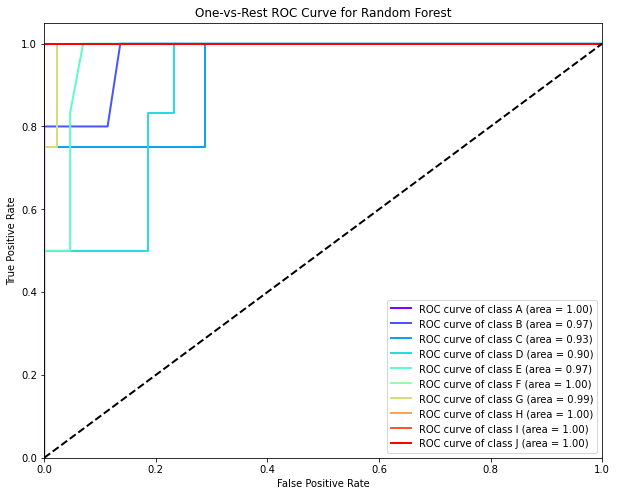

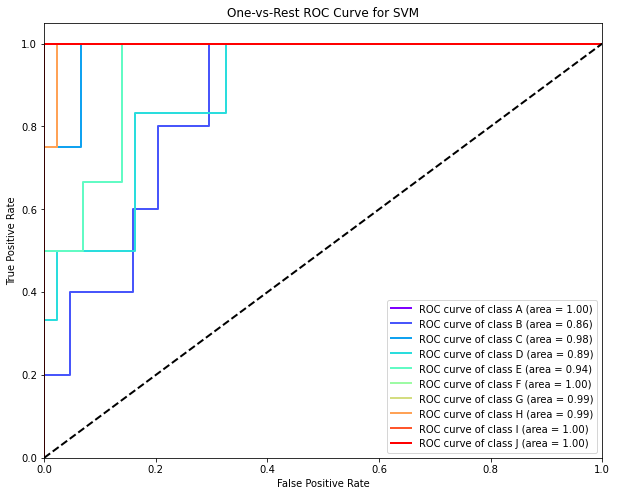

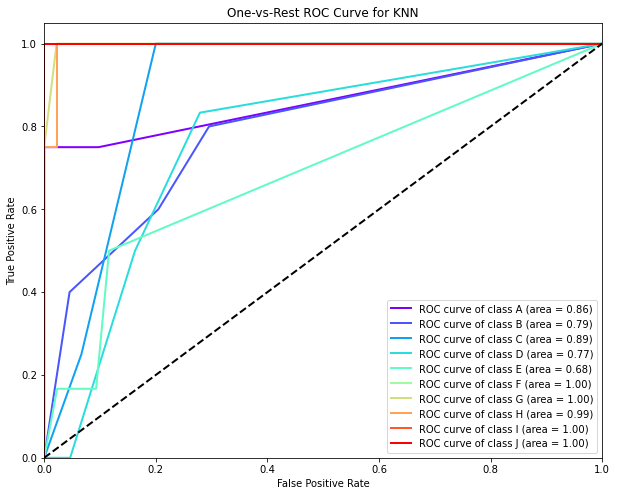

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_test contains the true labels for your test set
# You need to binarize these labels for the One-vs-Rest approach
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# Compute the probabilities for each class using predict_proba method for each model
# Replace rf_model, svm_model, xgb_model, knn_model with your trained models
y_score_rf = rf_model.predict_proba(X_test_selected)
y_score_svm = svm_model.predict_proba(X_test_selected)
#y_score_xgb = xgb_model.predict_proba(X_test_selected)
y_score_knn = knn_model.predict_proba(X_test_selected)

# Function to plot ROC curve for each class and compute AUC
def plot_roc_curve(y_test_bin, y_score, model_name):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = y_test_bin.shape[1]

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plotting
    plt.figure(figsize=(10, 8))
    colors = iter(plt.cm.rainbow(np.linspace(0, 1, n_classes)))
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'.format(classes[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'One-vs-Rest ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curve for each model
plot_roc_curve(y_test_bin, y_score_rf, 'Random Forest')
plot_roc_curve(y_test_bin, y_score_svm, 'SVM')
#plot_roc_curve(y_test_bin, y_score_xgb, 'XGBoost')
plot_roc_curve(y_test_bin, y_score_knn, 'KNN')

# Model Evaluation

In [ ]:
from sklearn.metrics import roc_auc_score
import numpy as np

# Assuming y_score_rf, y_score_svm, y_score_xgb, y_score_knn are the predicted probabilities
# from the respective models for the test set

# Calculate the AUC for each model
auc_rf = roc_auc_score(y_test_bin, y_score_rf, multi_class='ovr')
auc_svm = roc_auc_score(y_test_bin, y_score_svm, multi_class='ovr')
#auc_xgb = roc_auc_score(y_test_bin, y_score_xgb, multi_class='ovr')
auc_knn = roc_auc_score(y_test_bin, y_score_knn, multi_class='ovr')

# Print the average AUC for each model
print(f'Average AUC for Random Forest: {auc_rf:.2f}')
print(f'Average AUC for SVM: {auc_svm:.2f}')
#print(f'Average AUC for XGBoost: {auc_xgb:.2f}')
print(f'Average AUC for KNN: {auc_knn:.2f}')

# Determine the best model
best_auc = max(auc_rf, auc_svm, auc_knn)
best_model = ''
if best_auc == auc_rf:
    best_model = 'Random Forest'
elif best_auc == auc_svm:
    best_model = 'SVM'
#elif best_auc == auc_xgb:
#    best_model = 'XGBoost'
else:
    best_model = 'KNN'

print(f'The best model based on average AUC is: {best_model}')

Average AUC for Random Forest: 0.98
Average AUC for SVM: 0.97
Average AUC for KNN: 0.90
The best model based on average AUC is: Random Forest
